<a href="https://colab.research.google.com/github/0sparsh2/Sketch-to-Face-using-Multi-GANs/blob/main/Sketch_To_Face_Using_Multi_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Smoothening

In [ ]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
# !wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models
# Now we use the V1.3 model for the demo
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 422, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 422 (delta 14), reused 27 (delta 10), pack-reused 381
Receiving objects: 100% (422/422), 5.36 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (207/207), done.
/content/GFPGAN
     |████████████████████████████████| 161 kB 5.5 MB/s 
     |████████████████████████████████| 5.8 MB 38.7 MB/s 
     |████████████████████████████████| 190 kB 35.3 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.5-py3-none-any.whl size=194482 sha256=d8a266fc0de333796cd590ec405812c99639c1f2089d06e9eafdf67d7e01d85c
  Stored in directory: /root/.cache/pip/wheels/74/1b/d0/8659cf028233dd1e3bf282271009fbf037dfc4ab761f32a032
Successfully built basicsr
     |████████████████████████████████| 59 kB 2.7 MB/s 
     |████████████████████████████████| 177 kB 10.3 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.w

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.2 to easy-install.pth file

Installed /content/GFPGAN
Processing dependencies for gfpgan==1.3.2
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tb-nightly==2.9.0a20220419
Best match: tb-nightly 2.9.0a20220419
Adding tb-nightly 2.9.0a20220419 to easy-inst

In [ ]:
'''# upload your own images
#Basically putting in an image in the GFPGAN/inputs/upload file
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)'''

"# upload your own images\n#Basically putting in an image in the GFPGAN/inputs/upload file\nimport os\nfrom google.colab import files\nimport shutil\n\nupload_folder = 'inputs/upload'\n\nif os.path.isdir(upload_folder):\n    shutil.rmtree(upload_folder)\nos.mkdir(upload_folder)\n\n# upload images\nuploaded = files.upload()\nfor filename in uploaded.keys():\n  dst_path = os.path.join(upload_folder, filename)\n  print(f'move {filename} to {dst_path}')\n  shutil.move(filename, dst_path)"

In [ ]:
'''
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf /contents/DeOldify/result_images
!python inference_gfpgan.py -i output.jpeg -o /contents/DeOldify/result_images -v 1.3 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

'''


'\n# Now we use the GFPGAN to restore the above low-quality images\n# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions\n# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo\n!rm -rf /contents/DeOldify/result_images\n!python inference_gfpgan.py -i output.jpeg -o /contents/DeOldify/result_images -v 1.3 -s 2 --bg_upsampler realesrgan\n\n# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...\n# \n#  -h                   show this help\n#  -i input             Input image or folder. Default: inputs/whole_imgs\n#  -o output            Output folder. Default: results\n#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3\n#  -s upscale           The final upsampling scale of the image. Default: 2\n#  -bg_upsampler        background upsampler. Default: realesrgan\n#  -bg_tile             Tile size for background sampler, 

In [ ]:
'''# We first visualize the cropped faces
# The left are the inputs images; the right are the results of GFPGAN

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread('contents/bruce.jpeg')
  img_output = imread('contents/bruce.jpeg')
  display(img_input, img_output)'''


"# We first visualize the cropped faces\n# The left are the inputs images; the right are the results of GFPGAN\n\nimport cv2\nimport matplotlib.pyplot as plt\ndef display(img1, img2):\n  fig = plt.figure(figsize=(25, 10))\n  ax1 = fig.add_subplot(1, 2, 1) \n  plt.title('Input image', fontsize=16)\n  ax1.axis('off')\n  ax2 = fig.add_subplot(1, 2, 2)\n  plt.title('GFPGAN output', fontsize=16)\n  ax2.axis('off')\n  ax1.imshow(img1)\n  ax2.imshow(img2)\ndef imread(img_path):\n  img = cv2.imread(img_path)\n  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n  return img\n\n# display each image in the upload folder\nimport os\nimport glob\n\ninput_folder = 'results/cropped_faces'\nresult_folder = 'results/restored_faces'\ninput_list = sorted(glob.glob(os.path.join(input_folder, '*')))\noutput_list = sorted(glob.glob(os.path.join(result_folder, '*')))\nfor input_path, output_path in zip(input_list, output_list):\n  img_input = imread('contents/bruce.jpeg')\n  img_output = imread('contents/bruce.jp

##Installations and importing DeOldify

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2344, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 2344 (delta 57), reused 30 (delta 10), pack-reused 2228
Receiving objects: 100% (2344/2344), 69.46 MiB | 28.38 MiB/s, done.
Resolving deltas: 100% (1065/1065), done.


In [ ]:
cd DeOldify

/content/DeOldify


In [ ]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [ ]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 129 kB 44.2 MB/s 
     |████████████████████████████████| 1.9 MB 46.4 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=24d4b27eb630ba75656790ee9ad57c62c37098990cd69838d1e89371e2018e33
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-04-19 20:23:03--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  25.3MB/s    in 10s     

2022-04-19 20:23:14 (23.8 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



In [ ]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2022-04-19 20:23:14--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2022-04-19 20:23:14 (40.5 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 195 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=07fd0e9b1ebd09ec60ebe84d325d82e3df9e6e53036dfe458d7b503a68d1ed81
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
cd /content

/content


##CGANs import

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#To connect the model trained through contextual GANs
#https://drive.google.com/file/d/1YDiTWus3Wjfz8_oEAyipVMEDaRvSPSSX/view?usp=sharing

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content

/content


In [ ]:
!git clone https://www.github.com/keras-team/keras-contrib.git

Cloning into 'keras-contrib'...
remote: Enumerating objects: 3634, done.
remote: Total 3634 (delta 0), reused 0 (delta 0), pack-reused 3634
Receiving objects: 100% (3634/3634), 861.24 KiB | 1.27 MiB/s, done.
Resolving deltas: 100% (2330/2330), done.


In [ ]:
cd /content/keras-contrib

/content/keras-contrib


In [ ]:
!python /content/keras-contrib/setup.py install

running install
running bdist_egg
running egg_info
creating keras_contrib.egg-info
writing keras_contrib.egg-info/PKG-INFO
writing dependency_links to keras_contrib.egg-info/dependency_links.txt
writing requirements to keras_contrib.egg-info/requires.txt
writing top-level names to keras_contrib.egg-info/top_level.txt
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_contrib
copying keras_contrib/__init__.py -> build/lib/keras_contrib
creating build/lib/keras_contrib/layers
copying keras_contrib/layers/crf.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/capsule.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/core.py -> build/lib/keras_contrib/layers
copying keras_contrib/layers/__init__.py -> build/lib/ker

In [ ]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image as im

In [ ]:
cd /content

/content


##Running Model

In [ ]:
def cgan():
  g_model = load_model('/content/drive/MyDrive/g_model.h5',custom_objects={'InstanceNormalization':InstanceNormalization})
  # load and resize the image
  ###img = load_img('/content/input.jpeg', target_size=(256, 256))
  img = load_img('input.jpeg', target_size=(256, 256))

  
  
  # convert to numpy array
  img = img_to_array(img)
  norm_img = (img.copy() - 127.5) / 127.5
  #norm_img = img.copy()
  g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
  g_img = g_img * 127.5 + 127.5
  g_img = cv2.resize(g_img, (192, 192))
  #crop image
  crop_img = g_img[24:168, 24:168]
  g_img = cv2.resize(crop_img, (192, 192))
  #cv2.imwrite("/content/output.jpeg", g_img )

  f = plt.figure(num=None,figsize=(12, 6),dpi=120)

  plt.imshow(g_img.astype('uint8'))

  plt.axis('off')
  fig = plt.gcf()

  print(g_img.shape)
  fig.savefig(fname="output.jpeg", format='jpeg')


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (146313216 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(192, 192, 3)


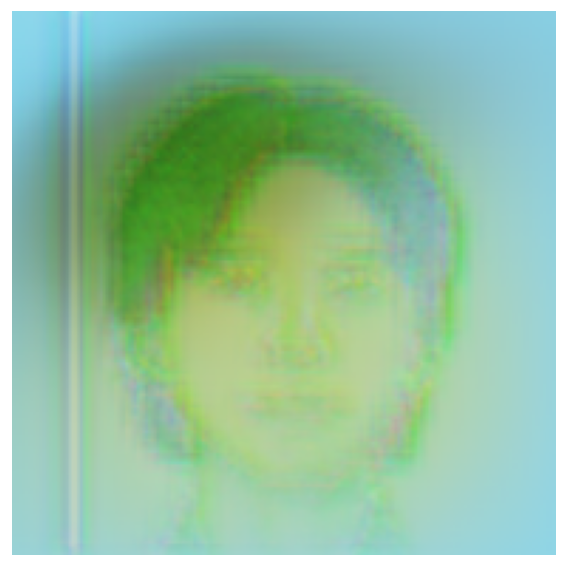

In [ ]:
cgan()

In [ ]:
cd /content/DeOldify

/content/DeOldify


In [ ]:
import fastai
from deoldify.visualize import *
import matplotlib.pyplot as plt
import warnings
from keras.preprocessing.image import load_img
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")
import anvil.server
from keras_preprocessing import image
import anvil.media
from PIL import Image as im
import numpy as np
import time

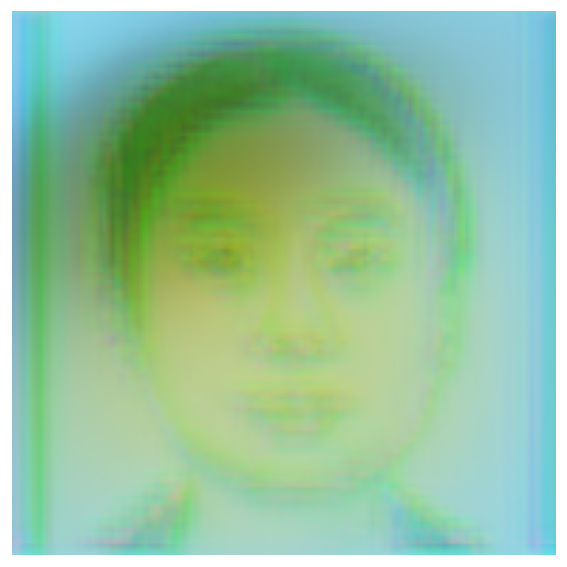

In [ ]:
colorizer = get_image_colorizer(artistic=True)

In [ ]:
cd /content

/content


In [ ]:
def smoother():
  print(time.time())

  #!rm -rf /contents/DeOldify/result_images
  warnings.filterwarnings("ignore", category=UserWarning)
  
  #!python /content/GFPGAN/inference_gfpgan.py -i /content/DeOldify/output.jpeg -o /content -v 1.3 -s 2 --bg_upsampler realesrgan
  #!python /content/GFPGAN/inference_gfpgan.py -i /content/output.jpeg -o /content -v 1.3 -s 2 --bg_upsampler realesrgan
  
  #!cd ~
  #!cd /content

  #cv2.resize('/content/DeOldify/result_images/output.jpeg',(192, 192), interpolation = cv2.INTER_AREA)
  #img = im.open('/content/output.jpeg')
  #img = img.resize((256,256))
  #img.save('/content/output.jpeg')
  #print(img.size)
  ###!python /content/GFPGAN/inference_gfpgan.py -i /content/output.jpeg -o /content -v 1.3 -s 2 --bg_upsampler realesrgan
  !python /content/GFPGAN/inference_gfpgan.py -i /content/DeOldify/output.jpeg -o /content -v 1.3 -s 2 --bg_upsampler realesrgan



  print(time.time())
  

  #!python inference_gfpgan.py -i output.jpeg -o /contents -v 1.3 -s 2 --bg_upsampler realesrgan
  #!cd ~
  #!cd /content/DeOldify


In [ ]:
smoother()

1650404480.060933
/content/GFPGAN/inference_gfpgan.py:62: UserWarning: The unoptimized RealESRGAN is slow on CPU. We do not use it. If you really want to use it, please modify the corresponding codes.
  warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:09<00:00, 11.4MB/s]
Processing output.jpeg ...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for inter

In [ ]:
def npy_to_img(numpy_img):
  
    plt.figure(figsize=(168, 168))
    plt.imshow(numpy_img)
    plt.axis('off')
    fig = plt.gcf()
    fig.savefig(fname="input.jpeg", format='jpeg')

    time.sleep(10)
    cgan()

    time.sleep(20)
    smoother()
    time.sleep(25)


    #colorizer.plot_transformed_image('/content/GFPGAN/restored_imgs/output.jpeg', render_factor=10, display_render_factor=False, figsize=(168,168))
    
    !cd /content/DeOldify
    colorizer.plot_transformed_image('/content/restored_imgs/output.jpeg', render_factor=35, display_render_factor=True, figsize=(192,192))
    !cd /content
    time.sleep(10)
    #smoother()
    #time.sleep(25)
    
    return anvil.media.from_file('/content/DeOldify/result_images/output.jpeg', 'image/jpeg')

In [ ]:
ls

api_cmd_example.sh*                     input.jpeg
app.py                                  keras-contrib/
app_utils.py                            LICENSE
app-video.py                            MANIFEST.in
colab_requirements.txt                  models/
ColorFIDBenchmarkArtistic.ipynb         output.jpeg
ColorizeTrainingArtistic.ipynb          quick_start.sh*
ColorizeTrainingStable.ipynb            README.md
ColorizeTrainingStableLargeBatch.ipynb  requirements-dev.txt
ColorizeTrainingVideo.ipynb             requirements.txt
ColorizeTrainingWandb.ipynb             resource_images/
deoldify/                               result_images/
Dockerfile                              run_image_api.sh*
Dockerfile-api                          run_notebook.sh*
dummy/                                  run_video_api.sh*
environment.yml                         set_password.py*
fid/                                    setup.py
ImageColorizerArtisticTests.ipynb       test_images/
ImageColorizerColab.ipynb 

In [ ]:
#in order to make it run, need to change it's location.

In [ ]:
cd /content/DeOldify

NameError: ignored

In [ ]:
colorizer.plot_transformed_image('/content/restored_imgs/output.jpeg', render_factor=35, display_render_factor=True, figsize=(192,192))

FileNotFoundError: ignored

In [ ]:
cd /content

/content


In [ ]:
ls

cmp/            drive/   input.jpeg      restored_faces/
cropped_faces/  dummy/   keras-contrib/  restored_imgs/
DeOldify/       GFPGAN/  output.jpeg     sample_data/


In [ ]:

anvil.server.connect("******************************************")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:
@anvil.server.callable
def convert_image(file):
  with anvil.media.TempFile(file) as f:
    input_img = load_img(f)


  npimg = np.array(input_img)
  file2 = npy_to_img(npimg)

  

  lb11 = 'Sketch'
  lbl2 = 'Image'

  return lb11, lbl2, file2 #, npimg #, output_img

##Altered /content/GFPGAN/inference_gfpgan.py

Make changes in the internal file of GFPGANs stored as inference_gfpgan.py.
Copy and Paste into the code.

In [ ]:
#Make GFPGAN a library
#Alter inference_gfpgan below

'''
import argparse
import cv2
import glob
import numpy as np
import os
import torch
from basicsr.utils import imwrite

from gfpgan import GFPGANer


def main():
    """Inference demo for GFPGAN (for users).
    """
    parser = argparse.ArgumentParser()
    parser.add_argument(
        '-i',
        '--input',
        type=str,
        default='inputs/whole_imgs',
        help='Input image or folder. Default: inputs/whole_imgs')
    parser.add_argument('-o', '--output', type=str, default='results', help='Output folder. Default: results')
    # we use version to select models, which is more user-friendly
    parser.add_argument(
        '-v', '--version', type=str, default='1.3', help='GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3')
    parser.add_argument(
        '-s', '--upscale', type=int, default=2, help='The final upsampling scale of the image. Default: 2')

    parser.add_argument(
        '--bg_upsampler', type=str, default='realesrgan', help='background upsampler. Default: realesrgan')
    parser.add_argument(
        '--bg_tile',
        type=int,
        default=400,
        help='Tile size for background sampler, 0 for no tile during testing. Default: 400')
    parser.add_argument('--suffix', type=str, default=None, help='Suffix of the restored faces')
    parser.add_argument('--only_center_face', action='store_true', help='Only restore the center face')
    parser.add_argument('--aligned', action='store_true', help='Input are aligned faces')
    parser.add_argument(
        '--ext',
        type=str,
        default='auto',
        help='Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto')
    args = parser.parse_args()

    args = parser.parse_args()

    # ------------------------ input & output ------------------------
    if args.input.endswith('/'):
        args.input = args.input[:-1]
    if os.path.isfile(args.input):
        img_list = [args.input]
    else:
        img_list = sorted(glob.glob(os.path.join(args.input, '*')))

    os.makedirs(args.output, exist_ok=True)

    # ------------------------ set up background upsampler ------------------------
    if args.bg_upsampler == 'realesrgan':
        if not torch.cuda.is_available():  # CPU
            import warnings
            warnings.warn('The unoptimized RealESRGAN is slow on CPU. We do not use it. '
                          'If you really want to use it, please modify the corresponding codes.')
            bg_upsampler = None
        else:
            from basicsr.archs.rrdbnet_arch import RRDBNet
            from realesrgan import RealESRGANer
            model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=2)
            bg_upsampler = RealESRGANer(
                scale=2,
                model_path='https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth',
                model=model,
                tile=args.bg_tile,
                tile_pad=10,
                pre_pad=0,
                half=True)  # need to set False in CPU mode
    else:
        bg_upsampler = None

    # ------------------------ set up GFPGAN restorer ------------------------
    if args.version == '1':
        arch = 'original'
        channel_multiplier = 1
        model_name = 'GFPGANv1'
    elif args.version == '1.2':
        arch = 'clean'
        channel_multiplier = 2
        model_name = 'GFPGANCleanv1-NoCE-C2'
    elif args.version == '1.3':
        arch = 'clean'
        channel_multiplier = 2
        model_name = 'GFPGANv1.3'
    else:
        raise ValueError(f'Wrong model version {args.version}.')

    # determine model paths
    model_path = ('/content/GFPGAN/experiments/pretrained_models/GFPGANv1.3.pth')
    if not os.path.isfile(model_path):
        model_path = os.path.join('realesrgan/weights', model_name + '.pth')
    if not os.path.isfile(model_path):
        raise ValueError(f'Model {model_name} does not exist.')

    restorer = GFPGANer(
        model_path=model_path,
        upscale=args.upscale,
        arch=arch,
        channel_multiplier=channel_multiplier,
        bg_upsampler=bg_upsampler)

    # ------------------------ restore ------------------------
    for img_path in img_list:
        # read image
        img_name = os.path.basename(img_path)
        print(f'Processing {img_name} ...')
        basename, ext = os.path.splitext(img_name)
        input_img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        # restore faces and background if necessary
        cropped_faces, restored_faces, restored_img = restorer.enhance(
            input_img, has_aligned=args.aligned, only_center_face=args.only_center_face, paste_back=True)

        # save faces
        for idx, (cropped_face, restored_face) in enumerate(zip(cropped_faces, restored_faces)):
            # save cropped face
            save_crop_path = os.path.join(args.output, 'cropped_faces', f'{basename}_{idx:02d}.png')
            imwrite(cropped_face, save_crop_path)
            # save restored face
            if args.suffix is not None:
                save_face_name = f'{basename}_{idx:02d}_{args.suffix}.png'
            else:
                save_face_name = f'{basename}_{idx:02d}.png'
            save_restore_path = os.path.join(args.output, 'restored_faces', save_face_name)
            imwrite(restored_face, save_restore_path)
            # save comparison image
            cmp_img = np.concatenate((cropped_face, restored_face), axis=1)
            imwrite(cmp_img, os.path.join(args.output, 'cmp', f'{basename}_{idx:02d}.png'))

        # save restored img
        if restored_img is not None:
            if args.ext == 'auto':
                extension = ext[1:]
            else:
                extension = args.ext

            if args.suffix is not None:
                save_restore_path = os.path.join(args.output, 'restored_imgs', f'{basename}_{args.suffix}.{extension}')
            else:
                save_restore_path = os.path.join(args.output, 'restored_imgs', f'{basename}.{extension}')
            imwrite(restored_img, save_restore_path)

    print(f'Results are in the [{args.output}] folder.')


if __name__ == '__main__':
    main()
    '''


'\nimport argparse\nimport cv2\nimport glob\nimport numpy as np\nimport os\nimport torch\nfrom basicsr.utils import imwrite\n\nfrom gfpgan import GFPGANer\n\n\ndef main():\n    """Inference demo for GFPGAN (for users).\n    """\n    parser = argparse.ArgumentParser()\n    parser.add_argument(\n        \'-i\',\n        \'--input\',\n        type=str,\n        default=\'inputs/whole_imgs\',\n        help=\'Input image or folder. Default: inputs/whole_imgs\')\n    parser.add_argument(\'-o\', \'--output\', type=str, default=\'results\', help=\'Output folder. Default: results\')\n    # we use version to select models, which is more user-friendly\n    parser.add_argument(\n        \'-v\', \'--version\', type=str, default=\'1.3\', help=\'GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3\')\n    parser.add_argument(\n        \'-s\', \'--upscale\', type=int, default=2, help=\'The final upsampling scale of the image. Default: 2\')\n\n    parser.add_argument(\n        \'--bg_upsampler\', 